# Calculate total xsecs

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas



In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Open MadMiner files

In [5]:
sa_all = SampleAugmenter(sample_dir + 'samples.h5')
sa_tight = SampleAugmenter(sample_dir + 'samples_tight.h5')
sa_anti = SampleAugmenter(sample_dir + 'samples_antitight.h5')

13:51 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples.h5
13:51 madminer.sampling    INFO    Found 2 parameters
13:51 madminer.sampling    INFO    Found 32 nuisance parameters
13:51 madminer.sampling    INFO    Found 45 benchmarks, of which 6 physical
13:51 madminer.sampling    INFO    Found 33 observables
13:51 madminer.sampling    INFO    Found 1341798 events
13:51 madminer.sampling    INFO    Found morphing setup with 6 components
13:51 madminer.sampling    INFO    Found nuisance morphing setup
13:51 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
13:51 madminer.sampling    INFO    Found 2 parameters
13:51 madminer.sampling    INFO    Found 32 nuisance parameters
13:51 madminer.sampling    INFO    Found 45 benchmarks, of which 6 physical
13:51 madminer.sampling    INFO    Found 33 observables
13:51

In [7]:
(793714 + 548017) / 1341798

0.9999500669996527

## Cross sections

In [8]:
thetas_benchmarks_all, xsecs_benchmarks_all, _ = sa_all.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing_all, xsecs_morphing_all, _ = sa_all.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

13:55 madminer.sampling    INFO    Starting cross-section calculation
13:55 madminer.sampling    INFO    Starting cross-section calculation


In [9]:
thetas_benchmarks_tight, xsecs_benchmarks_tight, _ = sa_tight.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing_tight, xsecs_morphing_tight, _ = sa_tight.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

13:55 madminer.sampling    INFO    Starting cross-section calculation
13:55 madminer.sampling    INFO    Starting cross-section calculation


In [10]:
thetas_benchmarks_anti, xsecs_benchmarks_anti, _ = sa_anti.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing_anti, xsecs_morphing_anti, _ = sa_anti.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

13:55 madminer.sampling    INFO    Starting cross-section calculation
13:55 madminer.sampling    INFO    Starting cross-section calculation


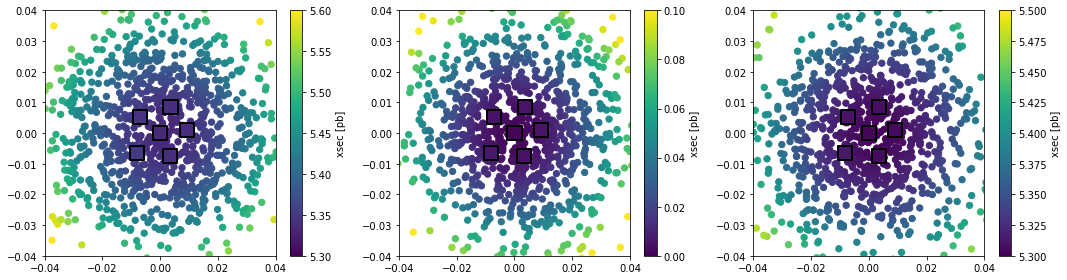

In [28]:
fig = plt.figure(figsize=(15,4))

ax = plt.subplot(1,3,1)
cmin, cmax = 5.3, 5.6
sc = plt.scatter(thetas_morphing_all[:,0], thetas_morphing_all[:,1], c=xsecs_morphing_all,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')
plt.scatter(thetas_benchmarks_all[:,0], thetas_benchmarks_all[:,1], c=xsecs_benchmarks_all,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')
cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')
plt.xlim(-0.04,.04)
plt.ylim(-0.04,.04)

ax = plt.subplot(1,3,2)
cmin, cmax = 0., 0.1
sc = plt.scatter(thetas_morphing_tight[:,0], thetas_morphing_tight[:,1], c=xsecs_morphing_tight,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')
plt.scatter(thetas_benchmarks_tight[:,0], thetas_benchmarks_tight[:,1], c=xsecs_benchmarks_tight,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')
cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')
plt.xlim(-0.04,.04)
plt.ylim(-0.04,.04)

ax = plt.subplot(1,3,3)
cmin, cmax = 5.3, 5.5
sc = plt.scatter(thetas_morphing_anti[:,0], thetas_morphing_anti[:,1], c=xsecs_morphing_anti,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')
plt.scatter(thetas_benchmarks_anti[:,0], thetas_benchmarks_anti[:,1], c=xsecs_benchmarks_anti,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')
cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')
plt.xlim(-0.04,.04)
plt.ylim(-0.04,.04)


plt.tight_layout()
plt.savefig("../../../figures/wgamma/xsecs.pdf")